In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import jaccard_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [50]:
df_train = pd.read_csv("/Users/dana/Desktop/AHI/01_PAML/Project/ML_project_AHI_2025/Part_1/train_pca_data.csv")

In [51]:
# data prep
# drop target from clustering input
X = df_train.drop(columns=["er"]).values

# extract ground truth label
y_gt = df_train["er"].values.astype(int)

# for visualization, take the first two pcs only
X_2d = df_train[["pc1", "pc2"]].values

In [52]:
X

array([[-33.707707  ,   5.47949397,  -5.09215035, ...,   0.59722517,
          1.00894213,  -0.93840131],
       [ 41.46204653, -15.57384951,  16.31321571, ...,          nan,
                 nan,          nan],
       [  4.16995088, -15.93990166, -29.28731608, ...,   0.59722517,
         -2.12692933,  -0.93840131],
       ...,
       [ 38.31282324,   4.67565689, -12.15919667, ...,   0.76687646,
          1.25016302,          nan],
       [ 22.58672858,   0.4371099 ,   9.16739828, ...,  -0.25103125,
         -0.59919708,  -0.93840131],
       [ 26.47073904,   4.04358873,   5.86445257, ...,  -0.7599851 ,
          0.52650037,  -0.93840131]], shape=(184, 13))

In [53]:
# fix NaN issue

# load the saved datasets
df_train = pd.read_csv("/Users/dana/Desktop/AHI/01_PAML/Project/ML_project_AHI_2025/Part_1/train_pca_data.csv")
df_val = pd.read_csv("/Users/dana/Desktop/AHI/01_PAML/Project/ML_project_AHI_2025/Part_1/val_pca_data.csv")
df_test = pd.read_csv("/Users/dana/Desktop/AHI/01_PAML/Project/ML_project_AHI_2025/Part_2/test_pca_data_imputed.csv")

# metadata columns that contain nan values
meta_cols = ["node", "grade", "size", "age","relaps"]

# compute column means using ONLY the training set
meta_means = df_train[meta_cols].mean()

# apply imputation to train, val and test sets
df_train[meta_cols] = df_train[meta_cols].fillna(meta_means)
df_val[meta_cols] = df_val[meta_cols].fillna(meta_means)
df_test[meta_cols] = df_test[meta_cols].fillna(meta_means)

# save clean versions
df_train.to_csv("train_pca_data_imputed.csv", index=False)
df_val.to_csv("val_pca_data_imputed.csv", index=False)
df_test.to_csv("test_pca_data_imputed.csv", index=False)

In [54]:
df_train = pd.read_csv("/Users/dana/Desktop/AHI/01_PAML/Project/ML_project_AHI_2025/Part_2/train_pca_data_imputed.csv")

In [55]:
# data prep
# drop target from clustering input
X = df_train.drop(columns=["er"]).values

# extract ground truth label
y_gt = df_train["er"].values.astype(int)

# for visualization, take the first two pcs only
X_2d = df_train[["pc1", "pc2"]].values

In [56]:
# kmeans
y_k = KMeans(n_clusters=2, 
            # n_init=10, 
             n_init='auto',
             random_state=42).fit(X).labels_

# gaussian mixture models
y_gm_full = GaussianMixture(n_components=2, covariance_type="full", random_state=42).fit_predict(X)
y_gm_spherical = GaussianMixture(n_components=2, covariance_type="spherical", random_state=42).fit_predict(X)
y_gm_diag = GaussianMixture(n_components=2, covariance_type="diag", random_state=42).fit_predict(X)
y_gm_tied = GaussianMixture(n_components=2, covariance_type="tied", random_state=42).fit_predict(X)

# agglomerative clustering
y_h = AgglomerativeClustering(n_clusters=2).fit(X).labels_

# dbscan
y_db = DBSCAN().fit(X).labels_

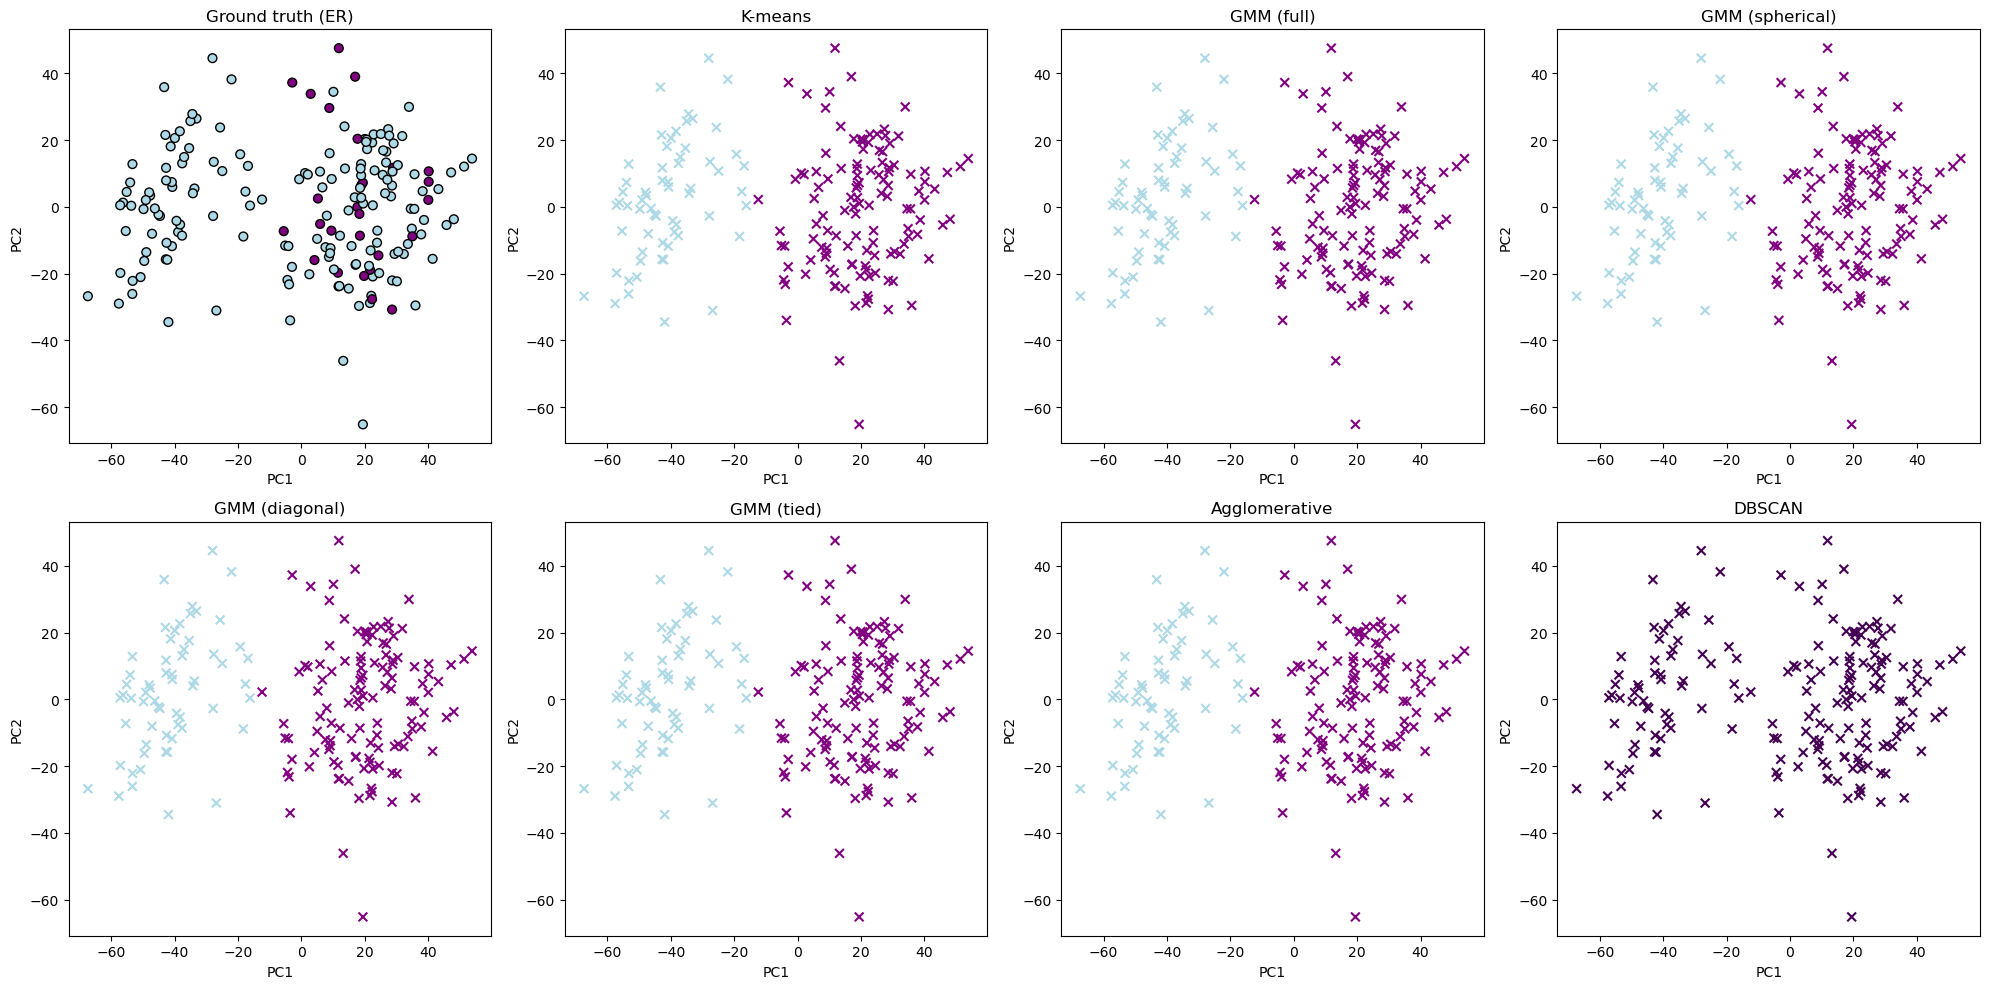

In [57]:
colors = ListedColormap(["purple", "lightblue"])
plt.figure(figsize=(20, 10))

# 1 ground truth
plt.subplot(2, 4, 1)
plt.scatter(X_2d[:, 0],X_2d[:, 1],c=y_gt,cmap=colors,edgecolor="k",s=40)
plt.title("Ground truth (ER)")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 2 kmeans
plt.subplot(2, 4, 2)
plt.scatter(X_2d[:, 0],X_2d[:, 1], c=y_k, cmap=colors, s=40,marker="x")
plt.title("K-means")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 3 gmm full
plt.subplot(2, 4, 3)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_gm_full, cmap=colors, s=40, marker="x")
plt.title("GMM (full)")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 4 gmm spherical
plt.subplot(2, 4, 4)
plt.scatter(X_2d[:, 0],   X_2d[:, 1],   c=y_gm_spherical,   cmap=colors,   s=40,  marker="x")
plt.title("GMM (spherical)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# 5 gmm diagonal
plt.subplot(2, 4, 5)
plt.scatter(   X_2d[:, 0],  X_2d[:, 1],  c=y_gm_diag,  cmap=colors, s=40, marker="x")
plt.title("GMM (diagonal)")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 6 gmm tied
plt.subplot(2, 4, 6)
plt.scatter(X_2d[:, 0], X_2d[:, 1],c=y_gm_tied,cmap=colors,s=40,marker="x")
plt.title("GMM (tied)")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 7 agglomerative clustering
plt.subplot(2, 4, 7)
plt.scatter(X_2d[:, 0],X_2d[:, 1],c=y_h,cmap=colors,s=40,marker="x")
plt.title("Agglomerative")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 8 dbscan
plt.subplot(2, 4, 8)
plt.scatter(X_2d[:, 0],X_2d[:, 1],c=y_db,
s=40,marker="x")
plt.title("DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.savefig("clustering_VS_ground_truth.png", dpi=300)
plt.show()

/var/folders/vw/l75dqd9j0qj20rfkms8tr5gr0000gn/T/ipykernel_17603/2018959091.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(val)), label=f"{col} = {val:.2f}", s=30)


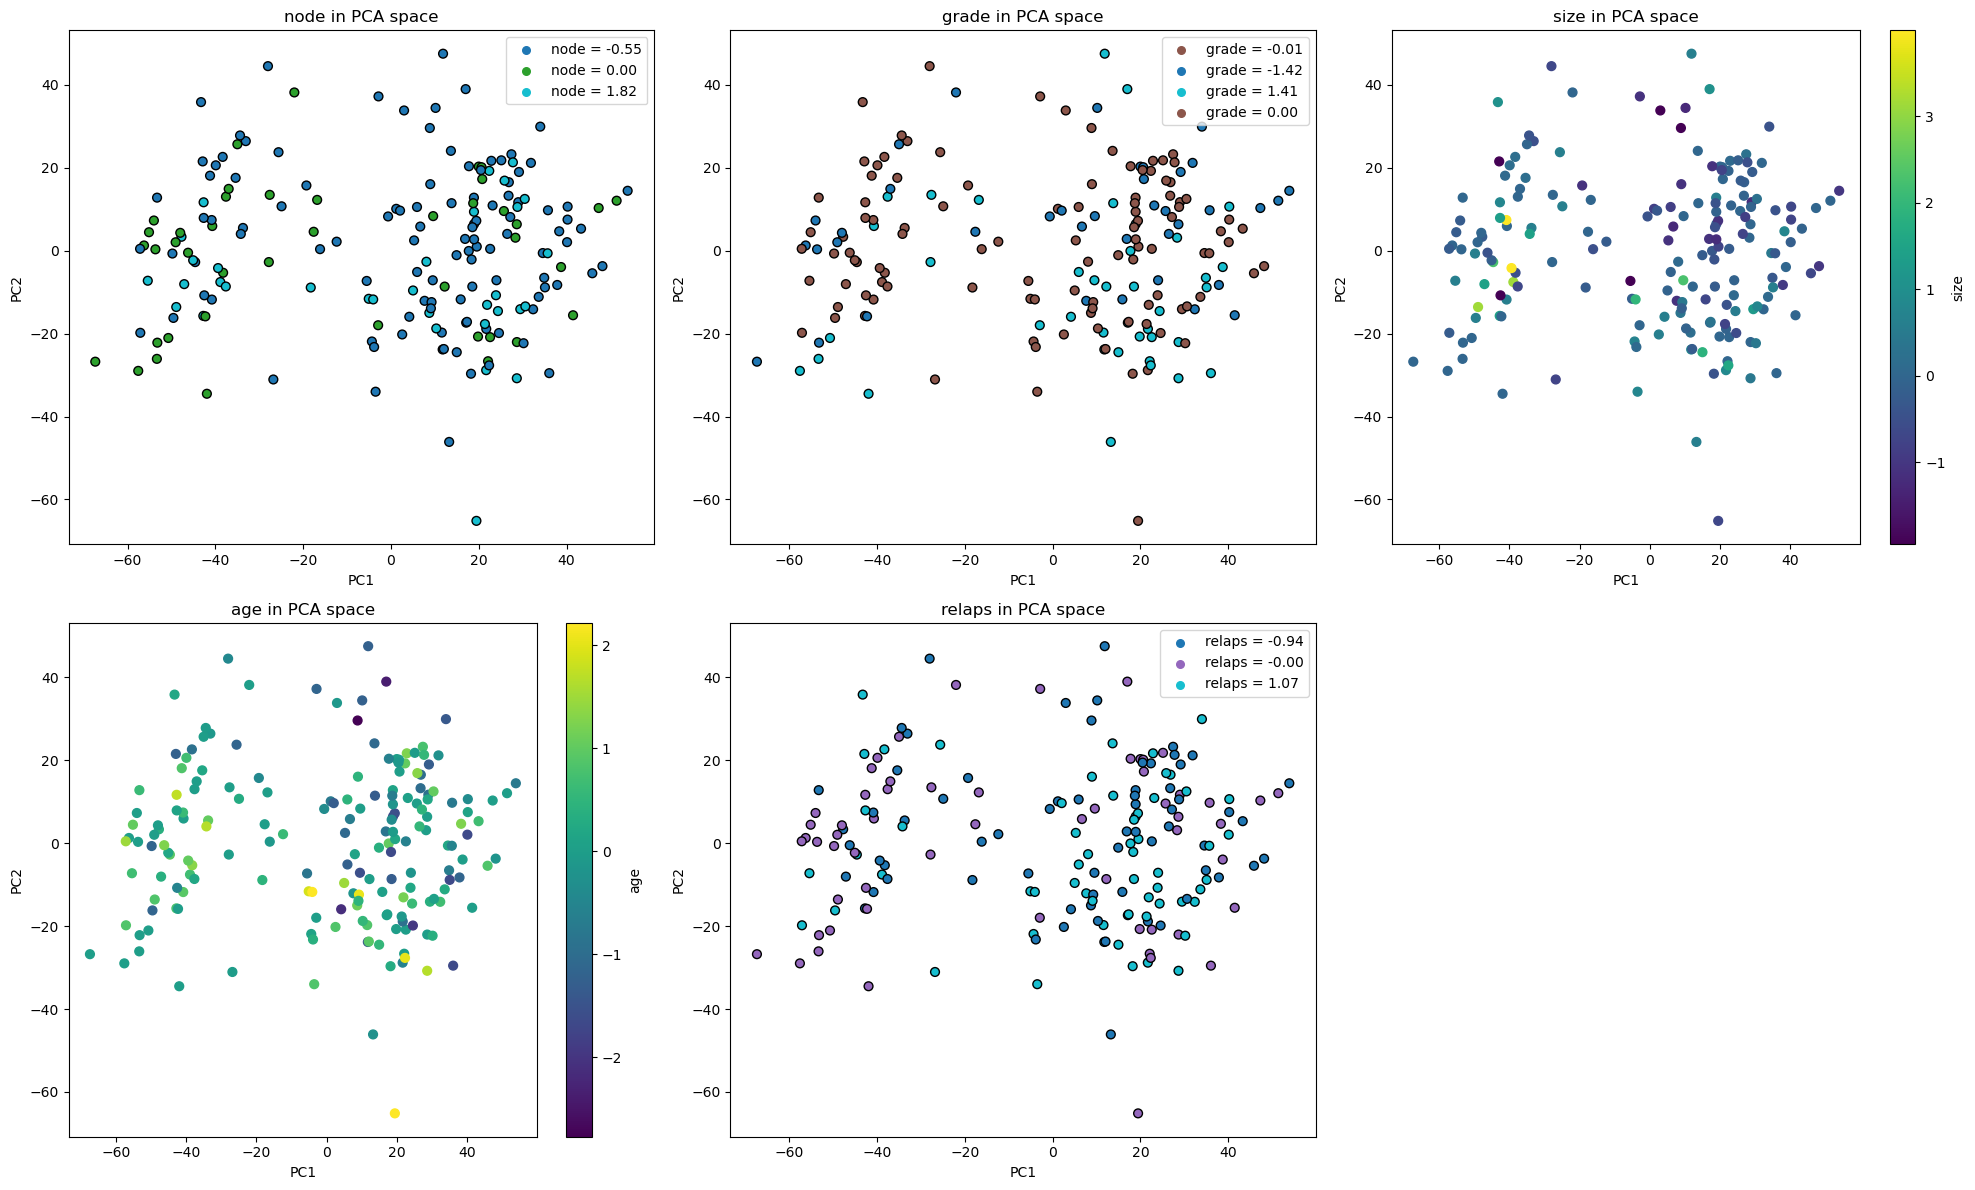

In [58]:
# extract 2d pca for plotting
X_2d = df_train[["pc1", "pc2"]]

# create plots
plt.figure(figsize=(20, 12))

for i, col in enumerate(meta_cols, 1):

    plt.subplot(2, 3, i)

    # check if column is binary/categorical or continuous
    unique_vals = df_train[col].nunique()

    if unique_vals <= 5:
        # categorical plot
        scatter = plt.scatter(
            X_2d["pc1"],
            X_2d["pc2"],
            c=df_train[col],
            cmap="tab10",
            edgecolor="k",
            s=40)
       # create legend entries
        unique_vals = df_train[col].unique()
        for val in unique_vals:
            plt.scatter([], [], c=scatter.cmap(scatter.norm(val)), label=f"{col} = {val:.2f}", s=30)

        # place legend inside the plot
        plt.legend(loc="upper right", frameon=True)

    else:
        # continuous plot
        scatter = plt.scatter(
            X_2d["pc1"],
            X_2d["pc2"],
            c=df_train[col],
            cmap="viridis",
            s=40
        )
        plt.colorbar(scatter, label=col)

    plt.title(f"{col} in PCA space")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

plt.tight_layout()
plt.savefig("clustering_VS_ground_truth_metadata.png", dpi=300)
plt.show()

# calculate jaccard_score

In [59]:
# ground truth (0/1)
y_true = y_gt.copy()

def jaccard_binary(true, pred):
    # jaccard score must be calculated for binary labels
    # but clustering may flip 0 and 1, so we compute both and take max
    score1 = jaccard_score(true, pred, average="binary")
    score2 = jaccard_score(true, 1 - pred, average="binary")
    return max(score1, score2)

results = {}

# kmeans
results["KMeans"] = jaccard_binary(y_true, y_k)

# gmm full
results["GMM_full"] = jaccard_binary(y_true, y_gm_full)

# gmm spherical
results["GMM_spherical"] = jaccard_binary(y_true, y_gm_spherical)

# gmm diagonal
results["GMM_diag"] = jaccard_binary(y_true, y_gm_diag)

# gmm tied
results["GMM_tied"] = jaccard_binary(y_true, y_gm_tied)

# agglomerative
results["Agglomerative"] = jaccard_binary(y_true, y_h)

# dbscan
# dbscan may produce label -1 (noise)
# map noise to class 0 (or drop noise points)
y_db_fixed = y_db.copy()
y_db_fixed[y_db_fixed == -1] = 0
results["DBSCAN"] = jaccard_binary(y_true, y_db_fixed)

# print results
for method, score in results.items():
    print(f"{method:15s}: {score:.3f}")

KMeans         : 0.522
GMM_full       : 0.522
GMM_spherical  : 0.522
GMM_diag       : 0.522
GMM_tied       : 0.522
Agglomerative  : 0.522
DBSCAN         : 0.853


In [60]:
#For k-means calculate silhouette, Davies–Bouldin scores for different numbers of clusters
K_values = range(2, 11)  # try k = 2–10
sil_scores = []
db_scores = []

for k in K_values:
    # fit kmeans
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)

    # compute metrics
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)

    sil_scores.append(sil)
    db_scores.append(db)

    print(f"k={k}: Silhouette={sil:.3f}, Davies-Bouldin={db:.3f}")

k=2: Silhouette=0.338, Davies-Bouldin=1.194
k=3: Silhouette=0.267, Davies-Bouldin=1.665
k=4: Silhouette=0.227, Davies-Bouldin=1.660
k=5: Silhouette=0.185, Davies-Bouldin=1.789
k=6: Silhouette=0.173, Davies-Bouldin=1.693
k=7: Silhouette=0.183, Davies-Bouldin=1.690
k=8: Silhouette=0.181, Davies-Bouldin=1.660
k=9: Silhouette=0.183, Davies-Bouldin=1.583
k=10: Silhouette=0.170, Davies-Bouldin=1.605


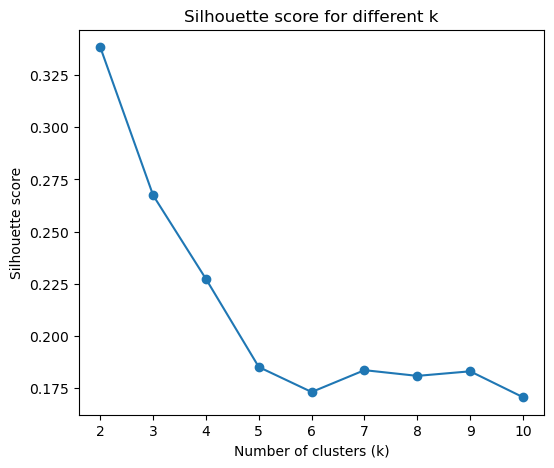

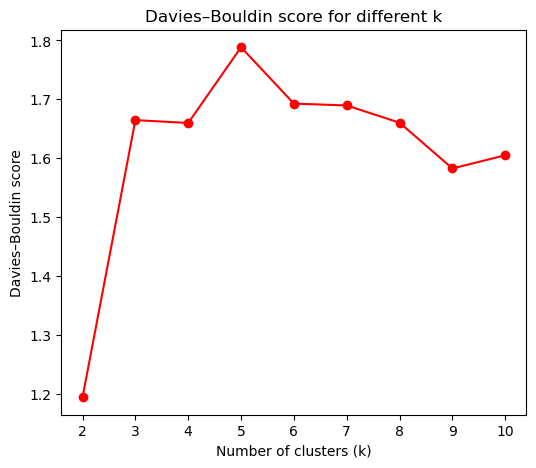

In [67]:
# plot silhouette score
plt.figure(figsize=(6, 5))
plt.plot(K_values, sil_scores, marker='o')
plt.title("Silhouette score for different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.grid(False)
plt.savefig("Silhouette_score.png", dpi=300)
plt.show()

# plot davies–bouldin score
plt.figure(figsize=(6, 5))
plt.plot(K_values, db_scores, marker='o', color='red')
plt.title("Davies–Bouldin score for different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies–Bouldin score")
plt.grid(False)
plt.savefig("Davies–Bouldin_score.png", dpi=300)
plt.show()

In [62]:
# kmeans
y_k = KMeans(n_clusters=9, n_init=10, random_state=42).fit(X).labels_

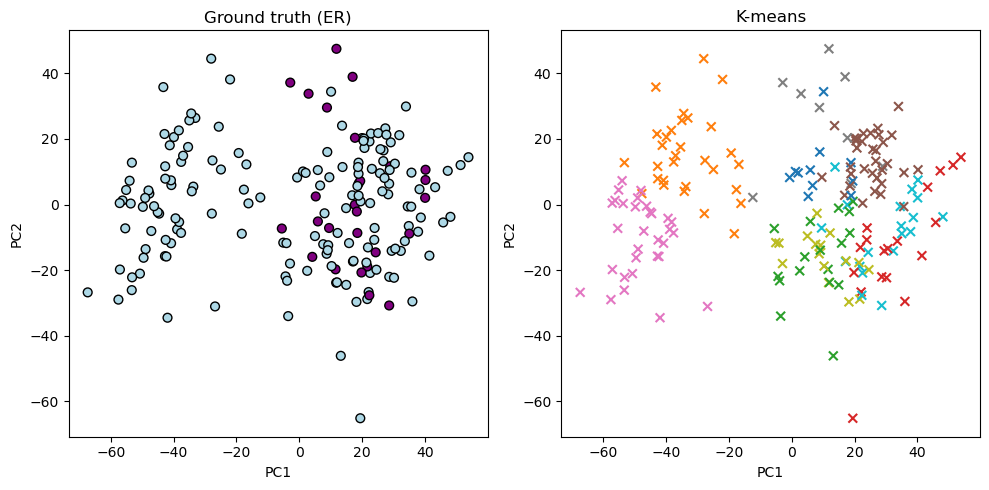

In [63]:
# drop target from clustering input
X = df_train.drop(columns=["er"]).values

# extract ground truth label
y_gt = df_train["er"].values.astype(int)

# for visualization, take the first two pcs only
X_2d = df_train[["pc1", "pc2"]].values

plt.figure(figsize=(10, 5))

# 1 ground truth
plt.subplot(1, 2, 1)
plt.scatter(X_2d[:, 0],X_2d[:, 1],c=y_gt,cmap=colors,edgecolor="k",s=40)
plt.title("Ground truth (ER)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# 2 kmeans
plt.subplot(1, 2, 2)
plt.scatter(X_2d[:, 0],X_2d[:, 1], c=y_k, cmap='tab10', s=40,marker="x")
plt.title("K-means")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.savefig("k=9_clustering_VS_ground_truth.png", dpi=300)
plt.show()

# Run without predetermined number of components

In [64]:
# kmeans
y_k = KMeans(n_init=10, random_state=42).fit(X).labels_

# gaussian mixture models
y_gm_full = GaussianMixture(covariance_type="full", random_state=42).fit_predict(X)
y_gm_spherical = GaussianMixture(covariance_type="spherical", random_state=42).fit_predict(X)
y_gm_diag = GaussianMixture(covariance_type="diag", random_state=42).fit_predict(X)
y_gm_tied = GaussianMixture(covariance_type="tied", random_state=42).fit_predict(X)

# agglomerative clustering
y_h = AgglomerativeClustering().fit(X).labels_

# dbscan
y_db = DBSCAN().fit(X).labels_

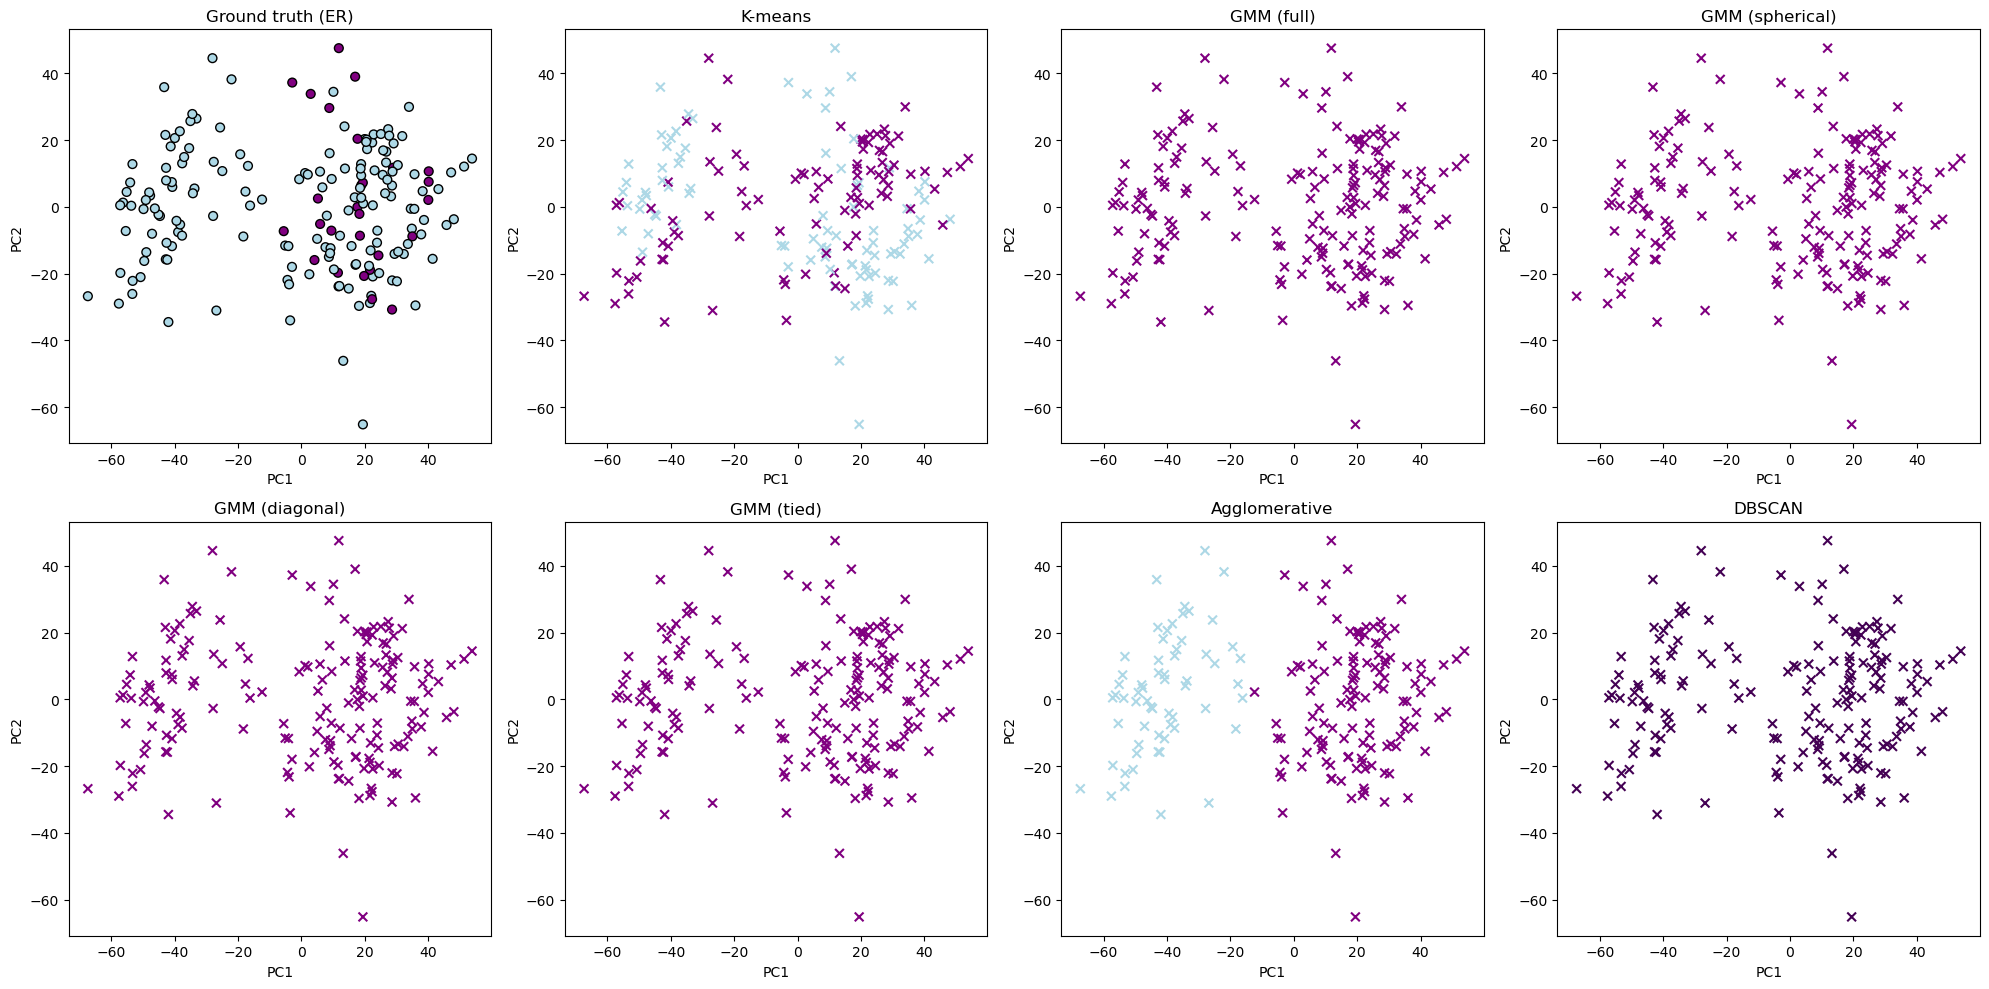

In [65]:
colors = ListedColormap(["purple", "lightblue"])
plt.figure(figsize=(20, 10))

# 1 ground truth
plt.subplot(2, 4, 1)
plt.scatter(X_2d[:, 0],X_2d[:, 1],c=y_gt,cmap=colors,edgecolor="k",s=40)
plt.title("Ground truth (ER)")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 2 kmeans
plt.subplot(2, 4, 2)
plt.scatter(X_2d[:, 0],X_2d[:, 1], c=y_k, cmap=colors, s=40,marker="x")
plt.title("K-means")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 3 gmm full
plt.subplot(2, 4, 3)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_gm_full, cmap=colors, s=40, marker="x")
plt.title("GMM (full)")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 4 gmm spherical
plt.subplot(2, 4, 4)
plt.scatter(X_2d[:, 0],   X_2d[:, 1],   c=y_gm_spherical,   cmap=colors,   s=40,  marker="x")
plt.title("GMM (spherical)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# 5 gmm diagonal
plt.subplot(2, 4, 5)
plt.scatter(   X_2d[:, 0],  X_2d[:, 1],  c=y_gm_diag,  cmap=colors, s=40, marker="x")
plt.title("GMM (diagonal)")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 6 gmm tied
plt.subplot(2, 4, 6)
plt.scatter(X_2d[:, 0], X_2d[:, 1],c=y_gm_tied,cmap=colors,s=40,marker="x")
plt.title("GMM (tied)")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 7 agglomerative clustering
plt.subplot(2, 4, 7)
plt.scatter(X_2d[:, 0],X_2d[:, 1],c=y_h,cmap=colors,s=40,marker="x")
plt.title("Agglomerative")
plt.xlabel("PC1")
plt.ylabel("PC2")


# 8 dbscan
plt.subplot(2, 4, 8)
plt.scatter(X_2d[:, 0],X_2d[:, 1],c=y_db,
s=40,marker="x")
plt.title("DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.savefig("clustering_VS_ground_truth_without_predetermined_num_of_components.png", dpi=300)
plt.show()

In [66]:
# ground truth (0/1)
y_true = y_gt.copy()

def jaccard_binary(true, pred):
    # jaccard score must be calculated for binary labels
    # but clustering may flip 0 and 1, so we compute both and take max
    score1 = jaccard_score(true, pred, average="weighted") # weighted take label imbalance into account
    score2 = jaccard_score(true, 1 - pred, average="weighted")
    return max(score1, score2)

results = {}

# kmeans
results["KMeans"] = jaccard_binary(y_true, y_k)

# gmm full
results["GMM_full"] = jaccard_binary(y_true, y_gm_full)

# gmm spherical
results["GMM_spherical"] = jaccard_binary(y_true, y_gm_spherical)

# gmm diagonal
results["GMM_diag"] = jaccard_binary(y_true, y_gm_diag)

# gmm tied
results["GMM_tied"] = jaccard_binary(y_true, y_gm_tied)

# agglomerative
results["Agglomerative"] = jaccard_binary(y_true, y_h)

# dbscan
# dbscan may produce label -1 (noise)
# map noise to class 0 (or drop noise points)
y_db_fixed = y_db.copy()
y_db_fixed[y_db_fixed == -1] = 0
results["DBSCAN"] = jaccard_binary(y_true, y_db_fixed)

# print results
for method, score in results.items():
    print(f"{method:15s}: {score:.3f}")

KMeans         : 0.200
GMM_full       : 0.728
GMM_spherical  : 0.728
GMM_diag       : 0.728
GMM_tied       : 0.728
Agglomerative  : 0.445
DBSCAN         : 0.728
